In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
patterns = {
    'A': np.array([[ 1, 1, 1, 1, 1],
                   [ 1,-1,-1,-1, 1],
                   [ 1, 1, 1, 1, 1],
                   [ 1,-1,-1,-1, 1],
                   [ 1,-1,-1,-1, 1]]),
    'B': np.array([[ 1, 1, 1, 1,-1],
                   [ 1,-1,-1,-1, 1],
                   [ 1, 1, 1, 1,-1],
                   [ 1,-1,-1,-1, 1],
                   [ 1, 1, 1, 1,-1]]),
    'C': np.array([[ 1, 1, 1, 1, 1],
                   [ 1,-1,-1,-1,-1],
                   [ 1,-1,-1,-1,-1],
                   [ 1,-1,-1,-1,-1],
                   [ 1, 1, 1, 1, 1]]),
    'J' : np.array([[ 1, 1, 1, 1, 1],
                    [-1,-1,-1, 1,-1],
                    [-1,-1,-1, 1,-1],
                    [1,-1,-1, 1,-1],
                    [ 1,1 ,1,-1,-1]])
}


In [3]:
def add_noise(pattern, noise_percentage):
    noise = np.random.choice([1, -1], size=pattern.shape, p=[1 - noise_percentage, noise_percentage])
    return np.where(noise == -1, pattern, noise)

class HopfieldNetwork:
    def __init__(self, patterns):
        self.num_features = patterns['A'].size
        self.weights = np.zeros((self.num_features, self.num_features))
        self.train(patterns)

        for pattern in patterns.values():
            pattern_vector = pattern.flatten()
            self.weights += np.outer(pattern_vector, pattern_vector)

        np.fill_diagonal(self.weights, 0)

    def train(self, patterns):
        for pattern in patterns.values():
            pattern_vector = pattern.flatten()
            self.weights += np.outer(pattern_vector, pattern_vector)

        np.fill_diagonal(self.weights, 0)
        self.weights /= len(patterns)

    def calculateEnergy(self, pattern):
        return -0.5 * np.dot(pattern.T, np.dot(self.weights, pattern))

    def recall(self, pattern, maxEpochs=20, tolerance=1e-5):
        s = pattern.flatten()
        previousEnergy = float('inf')

        for epoch in range(maxEpochs):
            currentEnergy = self.calculateEnergy(s)
            if abs(currentEnergy - previousEnergy) < tolerance:
                break

            previousEnergy = currentEnergy
            s = np.sign(np.dot(self.weights, s))
            s[s == 0] = pattern.flatten()[s == 0]

        plot_pattern(s.reshape(pattern.shape), "Retrieved Pattern")

        return s.reshape(pattern.shape)

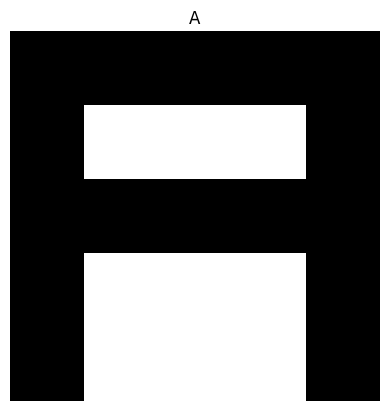

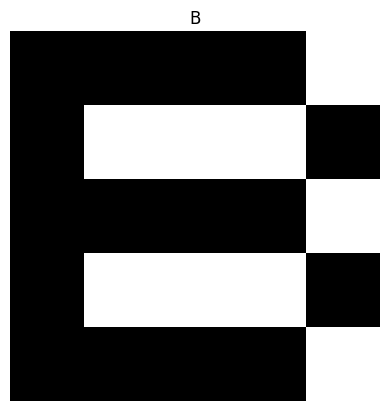

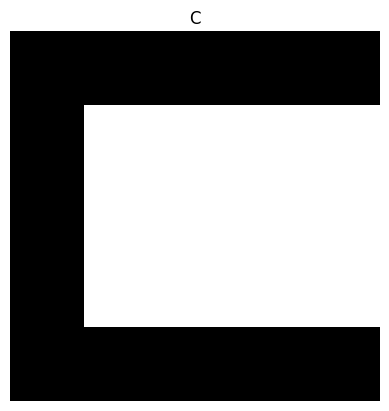

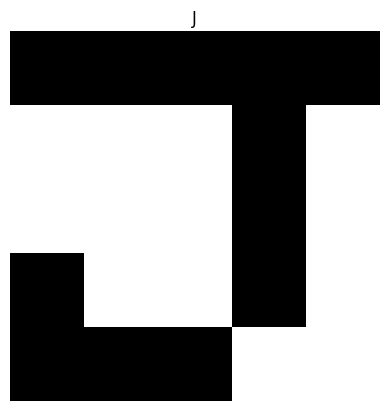

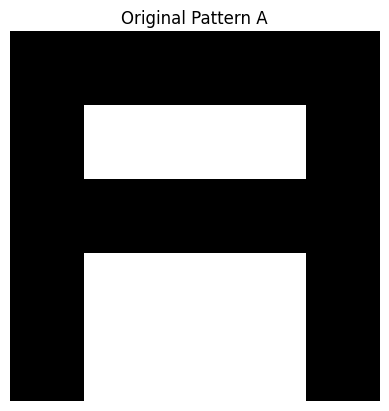

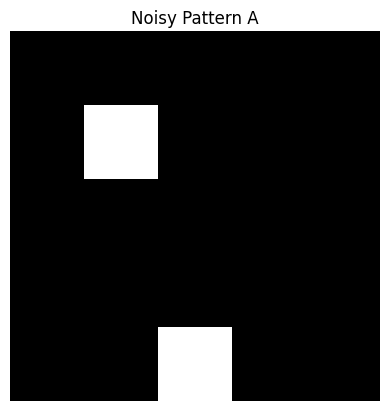

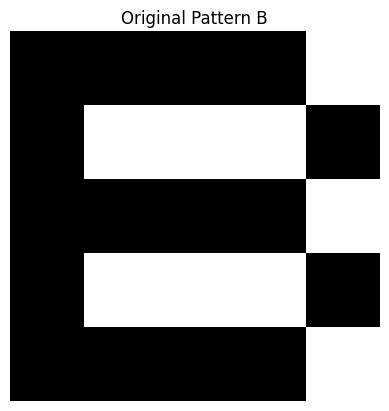

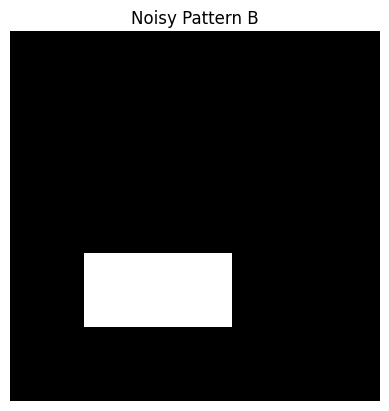

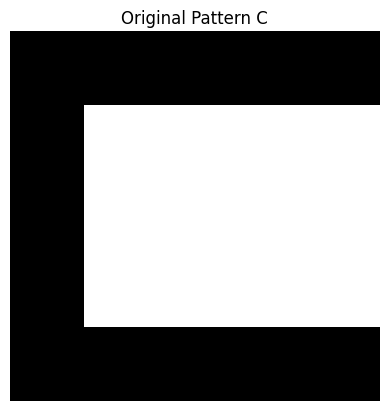

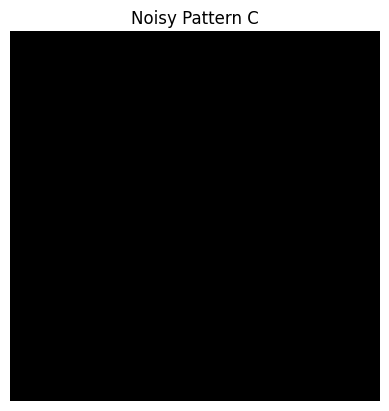

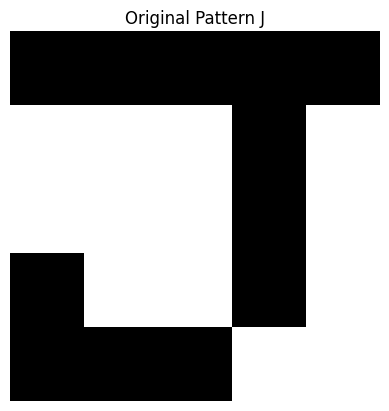

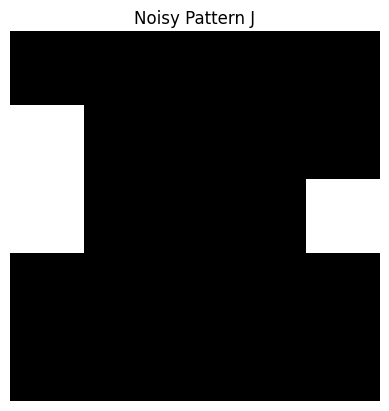

In [4]:
def plot_pattern(pattern, title):
    plt.imshow(pattern, cmap='binary', vmin=-1, vmax=1)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Define a noisy pattern
noisy_patterns = {key: add_noise(pattern, 0.1) for key, pattern in patterns.items()}

plot_pattern(patterns['A'],'A')
plot_pattern(patterns['B'],'B')
plot_pattern(patterns['C'],'C')
plot_pattern(patterns['J'],'J')
for key, noisy_pattern in noisy_patterns.items():
    plot_pattern(patterns[key], f"Original Pattern {key}")
    plot_pattern(noisy_pattern, f"Noisy Pattern {key}")


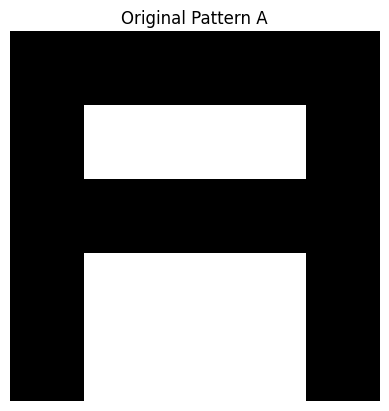

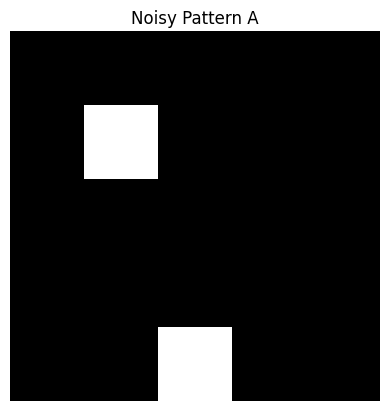

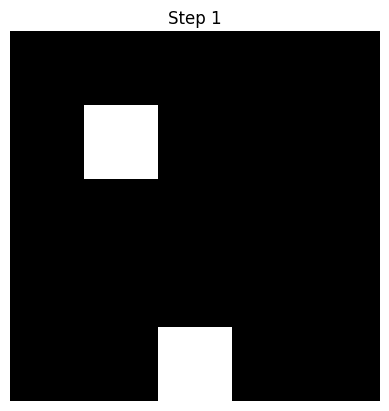

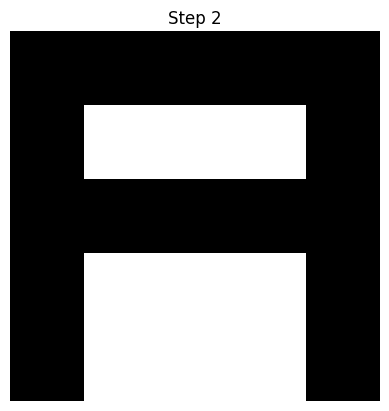

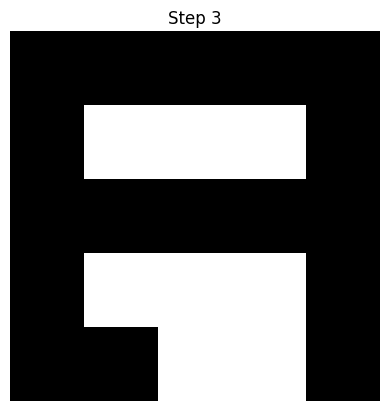

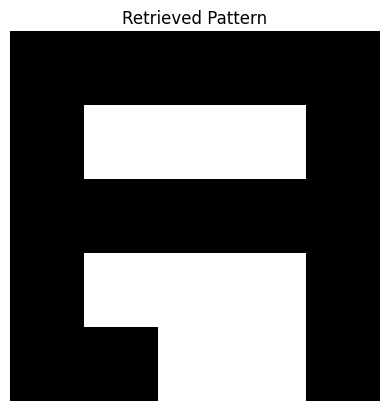

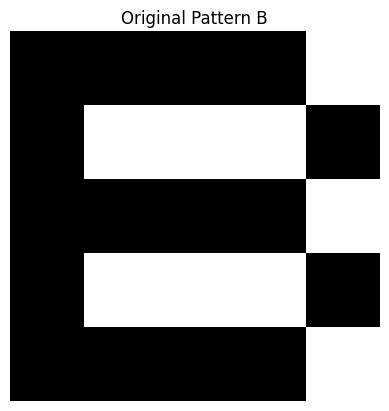

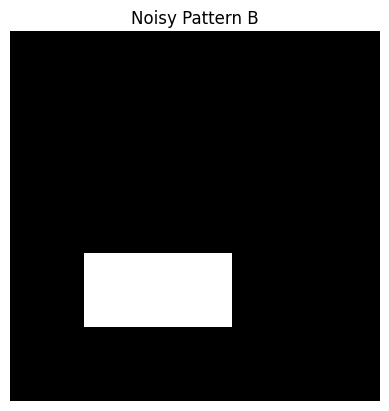

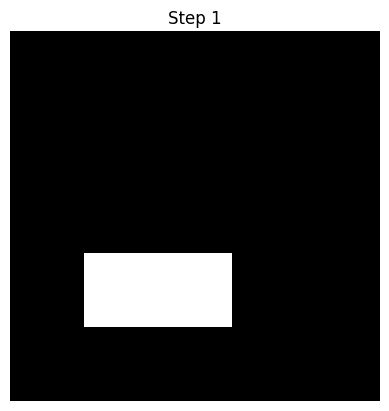

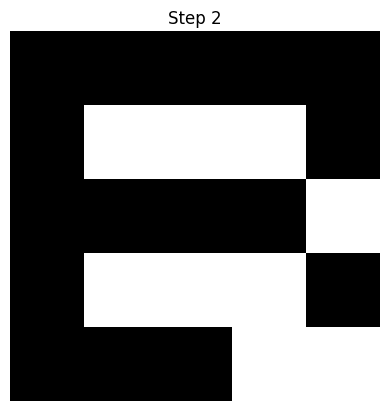

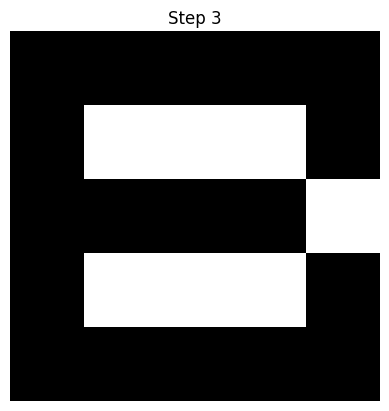

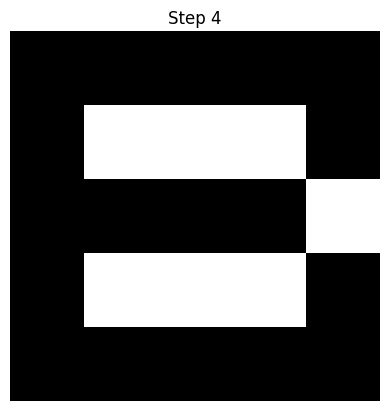

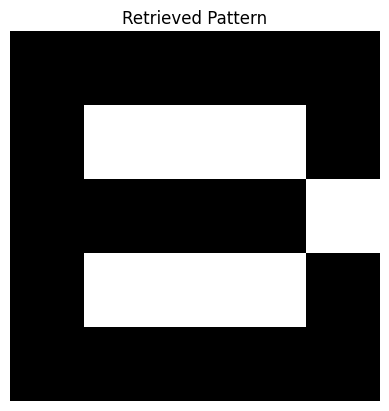

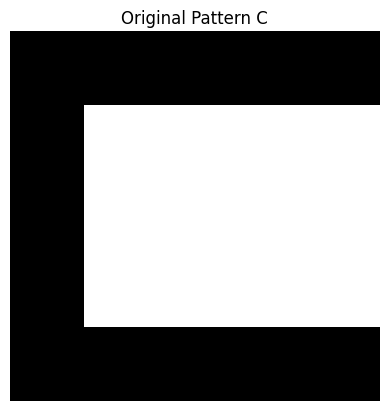

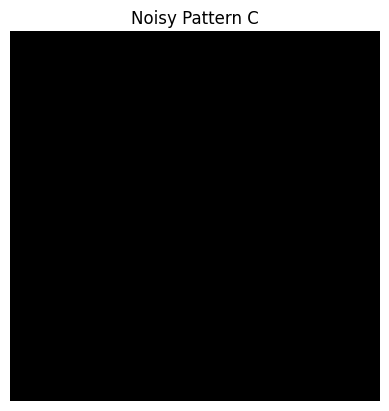

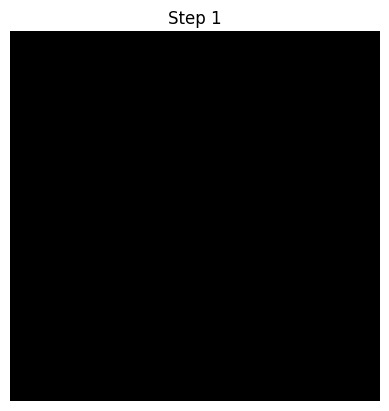

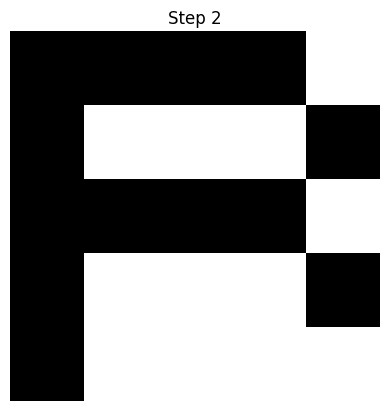

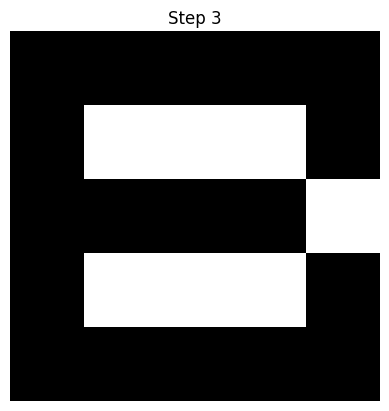

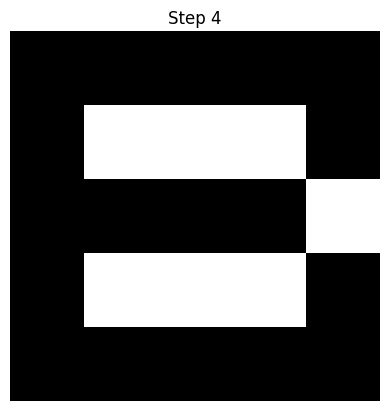

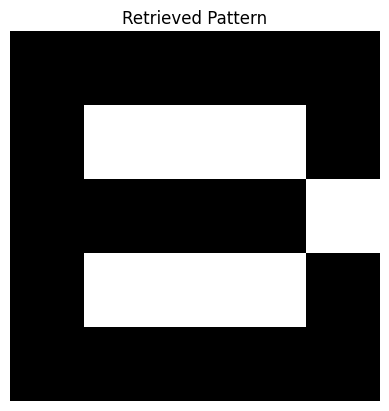

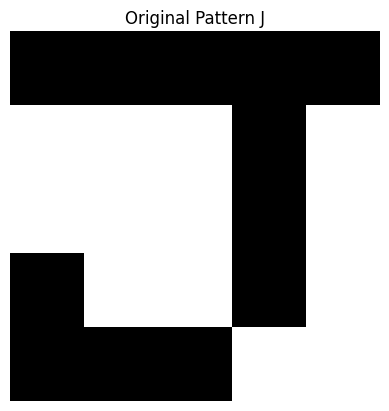

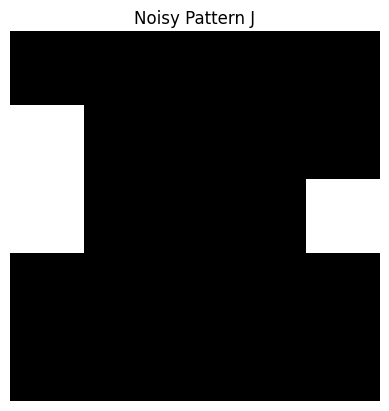

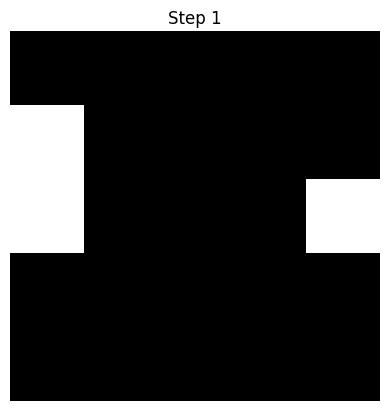

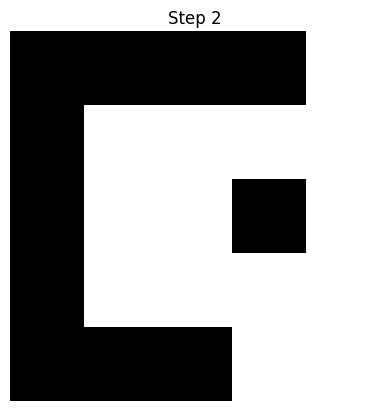

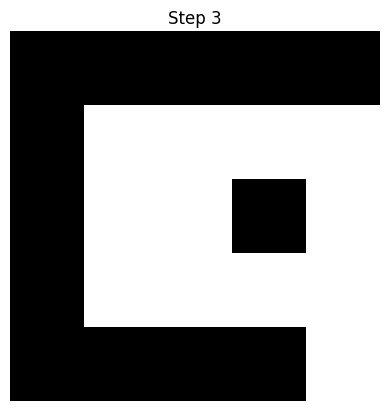

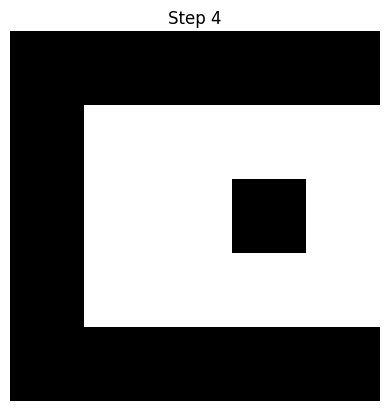

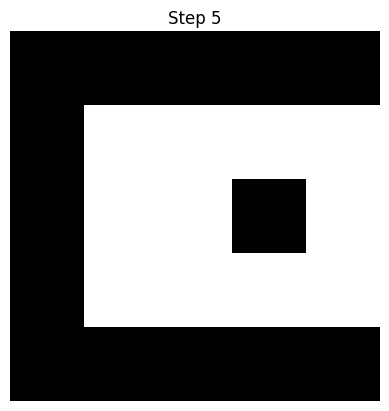

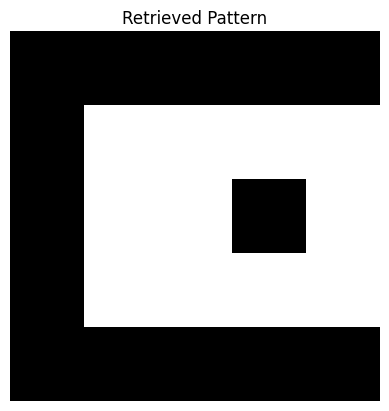

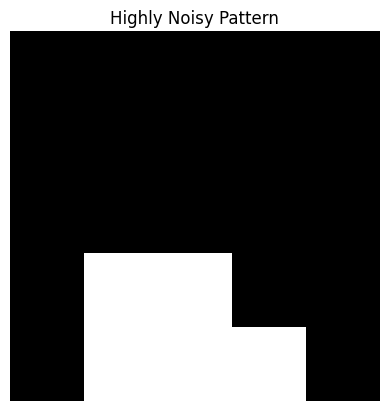

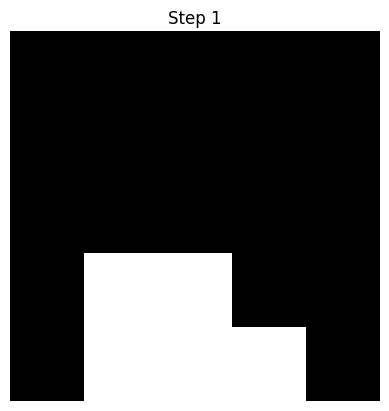

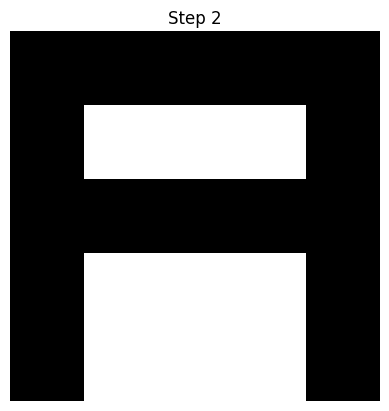

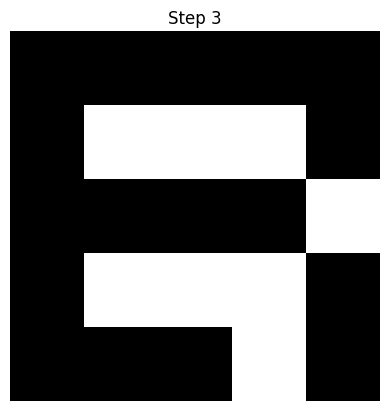

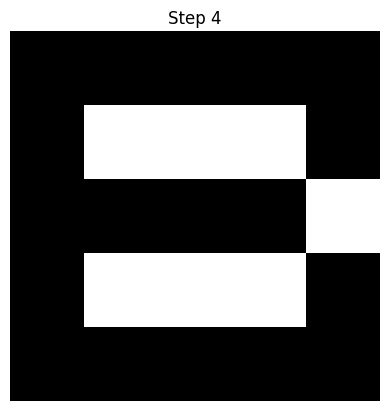

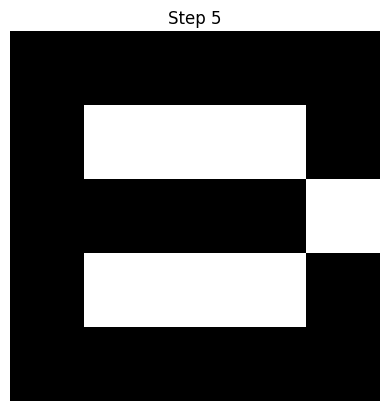

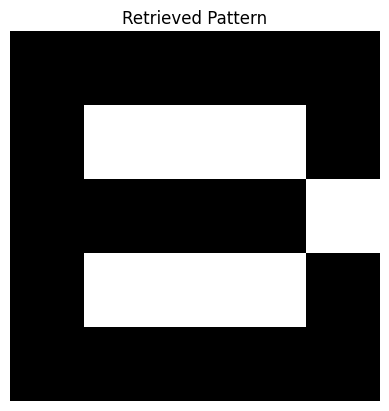

In [5]:
def show_retrieval_process(pattern, noisy_patterns):
    s = noisy_patterns.flatten()
    previousEnergy = float('inf')

    for epoch in range(10):
        plot_pattern(s.reshape(pattern.shape), f"Step {epoch + 1}")
        currentEnergy = hopfield_network.calculateEnergy(s)
        if abs(currentEnergy - previousEnergy) < 1e-5:
            break

        previousEnergy = currentEnergy
        s = np.sign(np.dot(hopfield_network.weights, s))
        s[s == 0] = noisy_pattern.flatten()[s == 0]

    plot_pattern(s.reshape(pattern.shape), "Retrieved Pattern")

# Creating the Hopfield network
hopfield_network = HopfieldNetwork(patterns)

# Showing the retrieval process for each noisy pattern
for key, noisy_pattern in noisy_patterns.items():
    plot_pattern(patterns[key], f"Original Pattern {key}")
    plot_pattern(noisy_pattern, f"Noisy Pattern {key}")
    show_retrieval_process(patterns[key], noisy_pattern)

# Inputting a highly noisy pattern and identifying a spurious state
highly_noisy_pattern = add_noise(patterns['A'], 0.5)
plot_pattern(highly_noisy_pattern, "Highly Noisy Pattern")
show_retrieval_process( patterns['A'], highly_noisy_pattern)